# Exploratory  Data Analysis & Prediction of  CIT(Crisis Intervention Team)     Certified Indicator

**Introduction** :Open source information transferred via Seattle city makes the information created by the City of Seattle straightforwardly accessible to people in general to expand the personal satisfaction for their residents and increasing straightforwardness,responsibility and similarity

**Objective** : To identify the trends and analyze the factors affecting and influencing the crisis contacts made by the Seattle Police Departmnet. This can be used in improving and handling the crisis managemnet effectivey. Here I am predicting the "CIT certified Indicator" based on the nature of the crisis and the factors influencing the crisis.

**Data Provided by** : City of Seattle

**Source Link** : http://www.seattle.gov/police

**Target Feature** :CIT Certified Indicator

**Rows** : 71.6k

**Columns** : 25

##### Importing necessary libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Reading the dataframe

In [128]:
df=pd.read_csv("Crisis_Data.csv")
df.head()

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
0,546319,1900-01-01T00:00:00,00:00:00,03/23/2019 02:42:33 PM,911,ASSIST OTHER AGENCY - ROUTINE SERVICE,--ASSIST OTHER AGENCY - COUNTY AGENCY,-,N,N,...,Two or More Races,1990,-1,N,NaN,NaN,NaN,North,BOY,B3
1,393200,1900-01-01T00:00:00,00:00:00,02/26/2018 12:29:35 AM,"TELEPHONE OTHER, NOT 911",PROPERTY - DAMAGE,--DISTURBANCE - OTHER,No Action Possible / Necessary,N,N,...,White,1991,-1,N,NaN,NaN,NaN,North,UNION,U2
2,78352,1900-01-01T00:00:00,00:00:00,09/01/2015 03:25:09 PM,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Voluntary Committal,N,N,...,White,1982,-1,N,NaN,NaN,NaN,North,UNION,U2
3,315652,1900-01-01T00:00:00,00:00:00,10/07/2017 01:28:33 AM,911,"DISTURBANCE, MISCELLANEOUS/OTHER",--CRISIS COMPLAINT - GENERAL,No Action Possible / Necessary,N,N,...,Asian,1987,-1,N,NaN,NaN,NaN,East,CHARLIE,C2
4,508470,1900-01-01T00:00:00,00:00:00,12/02/2018 08:44:38 AM,911,DIST - DV - NO ASLT,--CRISIS COMPLAINT - GENERAL,Resources Declined,N,N,...,White,1986,-1,N,NaN,NaN,NaN,West,QUEEN,Q3


##### Listing all the columns in the dataset

In [130]:
df.columns

Index(['Template ID', 'Reported Date', 'Reported Time', 'Occurred Date / Time',
       'Call Type', 'Initial Call Type', 'Final Call Type', 'Disposition',
       'Use of Force Indicator', 'Subject Veteran Indicator',
       'CIT Officer Requested', 'CIT Officer Dispatched',
       'CIT Officer Arrived', 'Officer ID', 'Officer Gender', 'Officer Race',
       'Officer Year of Birth', 'Officer Years of Experience',
       'CIT Certified Indicator', 'Officer Bureau Desc',
       'Officer Precinct Desc', 'Officer Squad Desc', 'Precinct', 'Sector',
       'Beat'],
      dtype='object')

**Template ID**: Key identifying unique Crisis Templates. This should be used to generate counts

**Reported Date**: Date the crisis Template was reported in the records management system can vary +1 day from the occurred date

**Reported Time**: Time the crisis template was reported in the records management system. Can vary several hours from the occurred time

**Occurred Date/Time**: Occurred date and time of the event associated with the crisis template. Can be null where no association can be made   o the underlying event

**Call Type**: How the call was received from

**Initial Call Type**: Initial classification of the call was made by the communication centre at the time of dispatch

**Final Call Type**: Final classification of the call was made by the officer closing the call, will differ from the initial call type

**Disposition**: Disposition of the crisis Template (one template per person per crisis involved contact) as reported by the officer

**Use of Force Indicator**: Indicates whether reported force was used or not

**Subject veteran indicator**: Indicates whether the subject of the crisis contact was identified by the officer as a veteran 

**CIT officer requested**: Indicates whether a crisis Intervention Team officer requested to respond the call

**CIT officer dispatched**: Indicates whether a crisis Intervention Team officer dispatched to the call

**CIT officer arrived**: Indicates whether a crisis Intervention Team officer arrived on the call

**Officer ID**: Unique ID

**Officer gender**: Gender of the officer (self-report), from HR data

**Officer Years of experience**: Years of law enforcement experience at the time the Crisis Template was reported in the Records Management System

**CIT certified Indicator**: CIT certification status of the officer at the time of event

**Officer Bureau Desc**: Bureau the officer was assigned to, at the time the crisis template was reported in the records management system

**Officer Precinct Desc**: Precinct the officer was assigned to, at the time the crisis template was reported in the records management system

**Officer Squad Desc**:  Squad the officer was assigned to, at the time the crisis template was reported in the records management system 

**Precint** : Geographic Precint area where call was located

**Sector**: Geographic Sector area where call was located

**Beat**: Geographic Beat where call was located

##### Printing Information about the DataFrame

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70928 entries, 0 to 70927
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Template ID                  70928 non-null  int64 
 1   Reported Date                70928 non-null  object
 2   Reported Time                70928 non-null  object
 3   Occurred Date / Time         70928 non-null  object
 4   Call Type                    70928 non-null  object
 5   Initial Call Type            70928 non-null  object
 6   Final Call Type              70928 non-null  object
 7   Disposition                  70928 non-null  object
 8   Use of Force Indicator       70928 non-null  object
 9   Subject Veteran Indicator    70928 non-null  object
 10  CIT Officer Requested        70928 non-null  object
 11  CIT Officer Dispatched       70928 non-null  object
 12  CIT Officer Arrived          70928 non-null  object
 13  Officer ID                   70

##### Displaying Unique values in respective columns 

In [20]:
df.nunique()

Template ID                    69990
Reported Date                   2527
Reported Time                      1
Occurred Date / Time           63985
Call Type                          9
Initial Call Type                175
Final Call Type                  210
Disposition                       30
Use of Force Indicator             2
Subject Veteran Indicator          2
CIT Officer Requested              2
CIT Officer Dispatched             2
CIT Officer Arrived                2
Officer ID                      1259
Officer Gender                     3
Officer Race                       9
Officer Year of Birth             53
Officer Years of Experience       82
CIT Certified Indicator            2
Officer Bureau Desc                6
Officer Precinct Desc             25
Officer Squad Desc               182
Precinct                           8
Sector                            18
Beat                              54
dtype: int64

Inferences:

We can see that the columns Template ID, Reported Date has 69930, 2525 unique values respectively

##### printing the shape of the dataframe

In [21]:
print(df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

(70928, 25)
Number of rows: 70928
Number of columns: 25


#### Null Values in Dataset

In [22]:
#Displaying null values in the dataset with respect to the columns
df.isna().sum()

Template ID                       0
Reported Date                     0
Reported Time                     0
Occurred Date / Time              0
Call Type                         0
Initial Call Type                 0
Final Call Type                   0
Disposition                       0
Use of Force Indicator            0
Subject Veteran Indicator         0
CIT Officer Requested             0
CIT Officer Dispatched            0
CIT Officer Arrived               0
Officer ID                        0
Officer Gender                    0
Officer Race                      0
Officer Year of Birth             0
Officer Years of Experience       0
CIT Certified Indicator           0
Officer Bureau Desc            5748
Officer Precinct Desc          6088
Officer Squad Desc             5699
Precinct                          0
Sector                            0
Beat                              0
dtype: int64

Inferences: 

The columns Officer Bureau Desc, Officer Precinct Desc, Officer Squad Desc has 5742, 6085, 5696 null values respectively.

##### Summary of numerical columns

In [23]:
#Displaying summary of numerical columns
df.describe()

,Template ID,Officer Year of Birth,Officer Years of Experience
count,7.092800e+04,70928.000000,70928.000000
mean,8.089804e+09,1982.190982,8.074724
std,1.068101e+10,10.796279,9.923349
min,4.346900e+04,1900.000000,-48.000000
25%,2.567618e+05,1976.000000,2.000000
50%,5.010235e+05,1985.000000,4.000000
75%,1.465038e+10,1990.000000,11.000000
max,3.274825e+10,2000.000000,80.000000


Inferences: 
    
We can see that the number of Years of experiene of Officers is 80. The officers also has years of births ranging from 1900 to 2000.

In [24]:
#Displaying the description of all columns
df.describe(include = 'all')

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
count,7.092800e+04,70928,70928,70928,70928,70928,70928,70928,70928,70928,...,70928,70928.000000,70928.000000,70928,65180,64840,65229,70928,70928,70928
unique,NaN,2527,1,63985,9,175,210,30,2,2,...,9,NaN,NaN,2,6,25,182,8,18,54
top,NaN,2021-05-21T00:00:00,00:00:00,01/01/1900 12:00:00 AM,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Emergent Detention / ITA,N,N,...,White,NaN,NaN,N,OPERATIONS BUREAU,WEST PCT,TRAINING - FIELD TRAINING SQUAD,West,KING,-
freq,NaN,52,70928,5501,47926,12667,49609,21714,69772,69263,...,48535,NaN,NaN,38754,57864,17190,6449,19162,6675,5833
mean,8.089804e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1982.190982,8.074724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.068101e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.796279,9.923349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.346900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1900.000000,-48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.567618e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1976.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.010235e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1985.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.465038e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1990.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inferences: 

The statistics of all the columns are displayed.

##### Displaying the crisis counts of Reported Date with repect to the months & years

In [25]:
df['Reprted_Year']=pd.to_datetime(df['Reported Date']).dt.year
df['Reported_Month']=pd.to_datetime(df['Reported Date']).dt.month

Text(0, 0.5, 'Count')

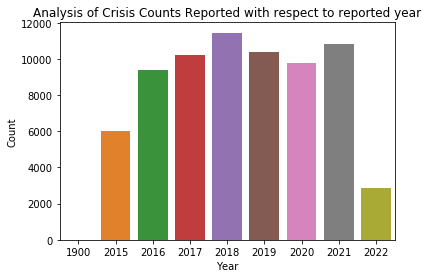

In [26]:
#plt.xticks([2015,2016,2107,2018,2019,2020,2021,2022])
#df['Reprted_Year'].value_counts().plot(kind='bar')
sns.countplot(data=df, x="Reprted_Year")
plt.title('Analysis of Crisis Counts Reported with respect to reported year')
plt.xlabel('Year')
plt.ylabel('Count')
#plt.xticks([2015,2016,2107,2018,2019,2020,2021,2022])

Inferences:

We can see that most of the most of the crisis are reported in 2018 and least in 2022. 

Text(0, 0.5, 'Count')

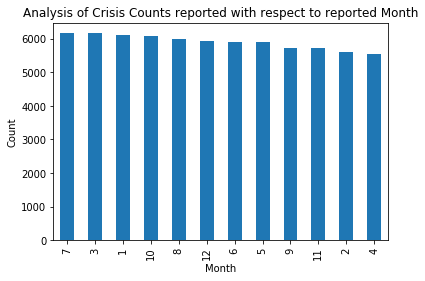

In [27]:
df['Reported_Month'].value_counts().plot(kind='bar')
plt.title('Analysis of Crisis Counts reported with respect to reported Month')
plt.xlabel('Month')
plt.ylabel('Count')

Inferences:

We can see that most of the most of the crisis are reported in month of July and least in April. 

##### Displaying the counts of Occurred Date / Time with repect to the months & years

In [28]:
df['Occurred_Year']=pd.to_datetime(df['Occurred Date / Time']).dt.year
df['Occurred_Month']=pd.to_datetime(df['Occurred Date / Time']).dt.month

Text(0, 0.5, 'Count')

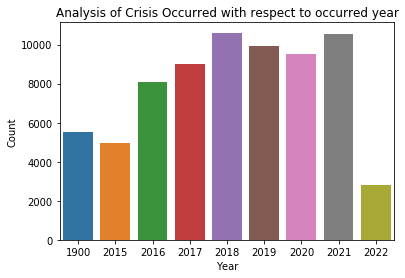

In [29]:
#df['Occurred_Year'].value_counts().plot(kind='bar')
sns.countplot(data=df, x="Occurred_Year")
plt.title('Analysis of Crisis Occurred with respect to occurred year')
plt.xlabel('Year')
plt.ylabel('Count')

Inferences:

We can see that most of the crisis Occurred Date / Time 2018 and least in  2022

Text(0, 0.5, 'Count')

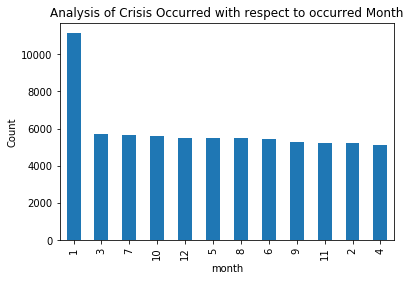

In [30]:
df['Occurred_Month'].value_counts().plot(kind='bar')
plt.title('Analysis of Crisis Occurred with respect to occurred Month')
plt.xlabel('month')
plt.ylabel('Count')

Inferences:

We can see that most of the crisis Occurred in January and least in April

##### Converting CIT Certified Indicator from Categorical to Numerical

In [31]:
df['CIT Certified Indicator']=df['CIT Certified Indicator'].map({'N':0,'Y':1})

##### Plotting the graph of CIT Certified Indicator with respect to the Reprted_Year

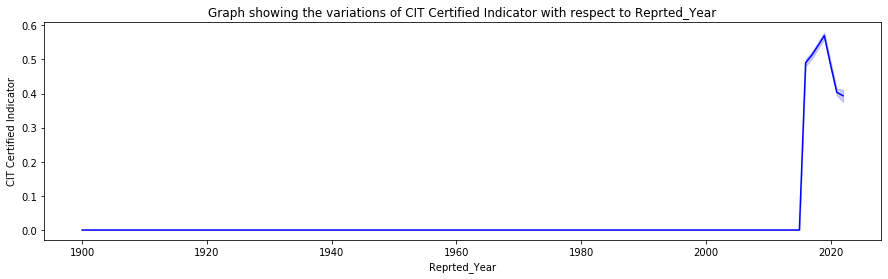

In [32]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Reprted_Year',y='CIT Certified Indicator', data =df, color = 'b')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Reprted_Year")
plt.xlabel("Reprted_Year")
plt.show()

##### Plotting the graph of CIT Certified Indicator with respect to the Occurred_Year

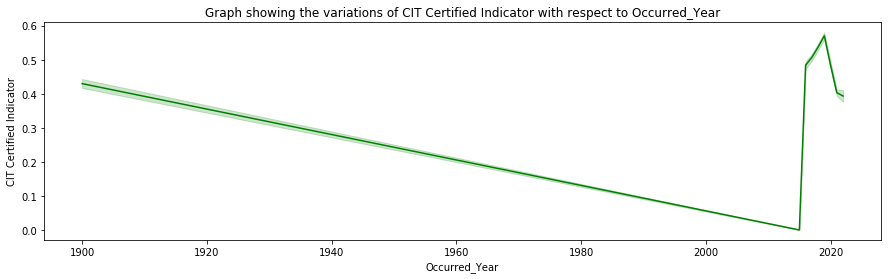

In [33]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Occurred_Year',y='CIT Certified Indicator', data =df, color = 'g')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Occurred_Year")
plt.xlabel("Occurred_Year")
plt.show()

##### Plotting the graph of CIT Certified Indicator with respect to the Reprted_Month

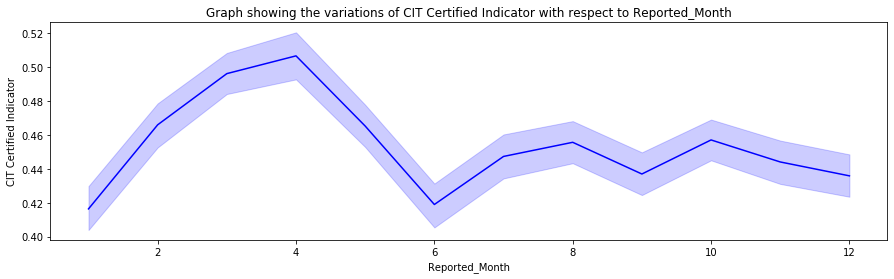

In [34]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Reported_Month',y='CIT Certified Indicator', data =df, color = 'b')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Reported_Month")
plt.xlabel("Reported_Month")
plt.show()

##### Plotting the graph of CIT Certified Indicator with respect to the Occurred_Month

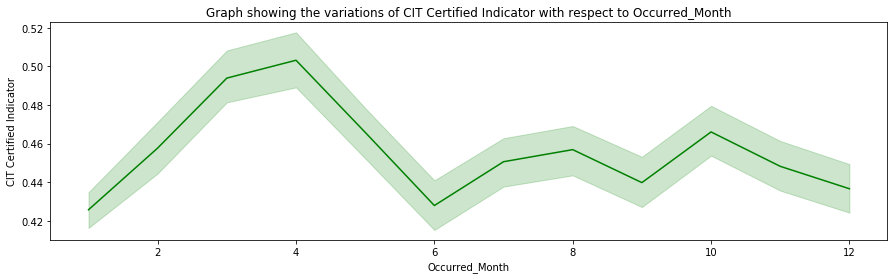

In [35]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Occurred_Month',y='CIT Certified Indicator', data =df, color = 'g')
plt.title("Graph showing the variations of CIT Certified Indicator with respect to Occurred_Month")
plt.xlabel("Occurred_Month")
plt.show()

Inferences:

Based on comparision with Months and Years on both Occurred Date / Time and Reported Date happen in same timespan

#### Plotting the graph of CIT Certified Indicator with  Officer Years of Experience

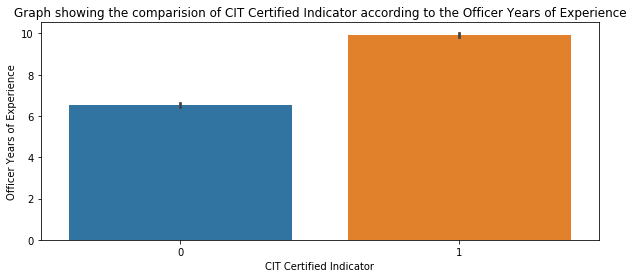

In [36]:

plt.figure(figsize=(10,4))
plt.title("Graph showing the comparision of CIT Certified Indicator according to the Officer Years of Experience")
plt.xlabel("CIT Certified Indicator")
sns.barplot(df['CIT Certified Indicator'],df['Officer Years of Experience'])

Inferences:
CIT Certified Indicator =1  is high based on Officer Years of Experience

 ##### Plotting the graph that compares the CIT Certified Indicator with Officer Years of Experience and Officer Gender

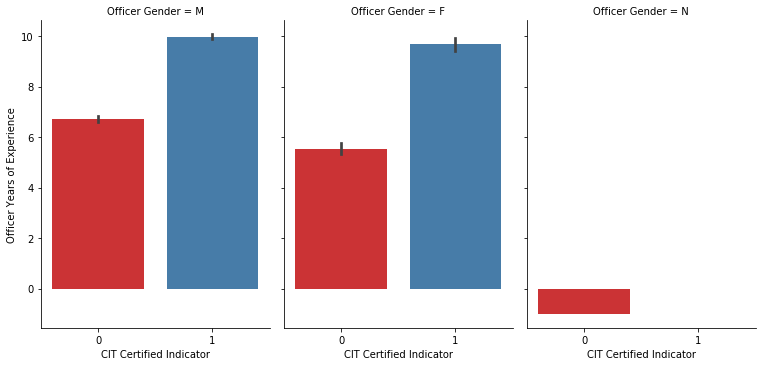

In [37]:
sns.catplot(x='CIT Certified Indicator',y='Officer Years of Experience', col = 'Officer Gender', data=df,
                kind='bar', aspect=.7, palette='Set1') 

Inferences:

Based on Properties and Gender Ratio CIT Certified Indicator =1 is high 
and if we understand Graph  Officer Gender='N'  having -ve Years of Experiance (but years of experiance must positive)

 ##### Plotting the graph of Officer Gender with Officer Years of Experience

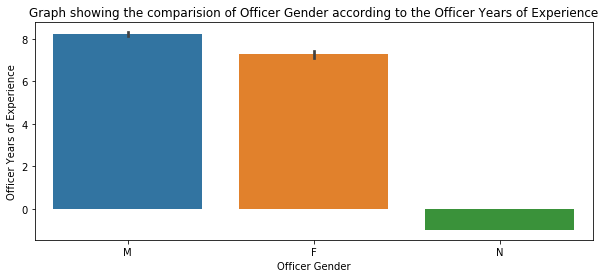

In [38]:
plt.figure(figsize=(10,4))
plt.title("Graph showing the comparision of Officer Gender according to the Officer Years of Experience")
plt.xlabel("Officer Gender")
sns.barplot(df['Officer Gender'],df['Officer Years of Experience'])

 ##### Plotting the graph that compares the Sector with Officer Years of Experience 

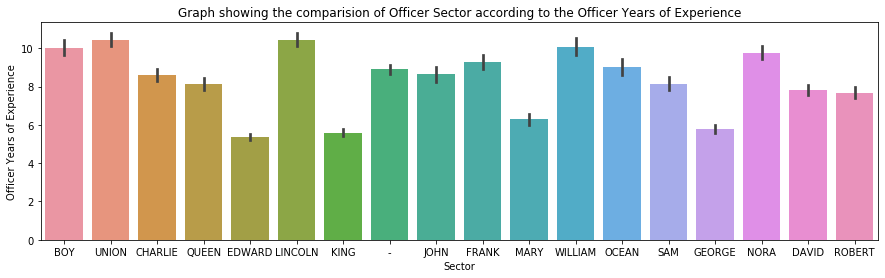

In [39]:
plt.figure(figsize=(15,4))
plt.title("Graph showing the comparision of Officer Sector according to the Officer Years of Experience")
plt.xlabel("Sector")
sns.barplot(df['Sector'],df['Officer Years of Experience'])

Inferences:
    
Based on Graph UNION and LINCLON sector officers having highest years

 ##### Plotting the graph that compares the Officer Gender with Reported_Month

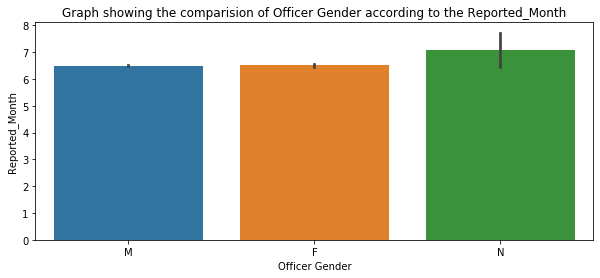

In [40]:
plt.figure(figsize=(10,4))
plt.title("Graph showing the comparision of Officer Gender according to the Reported_Month")
plt.xlabel("Officer Gender")
sns.barplot(df['Officer Gender'] ,df['Reported_Month'])

Inferences:

Officer Gender with indicator N  having Highest Reporting Months then compare to Male and Female 

##### Plotting the bar garph for Call Type and its individual counts

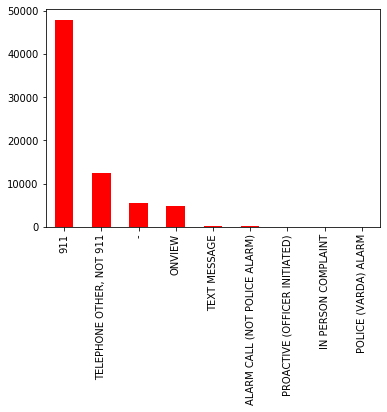

In [41]:
df['Call Type'].value_counts().plot(kind='bar', color='r')

Inferences:
    
We can see that here 9 indidual indicators in the indicator 911 has highest 47884 values

##### Plotting the bar garph for Disposition and its individual counts

Text(0, 0.5, 'Count')

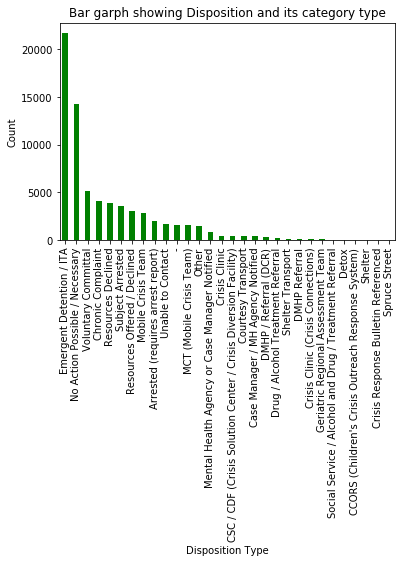

In [42]:
df['Disposition'].value_counts().plot(kind='bar', color='g')
plt.title('Bar garph showing Disposition and its category type')
plt.xlabel('Disposition Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 30 indidual indicators in the indicator Emergent Detention / ITA has highest 21700 values

Text(0, 0.5, 'Count')

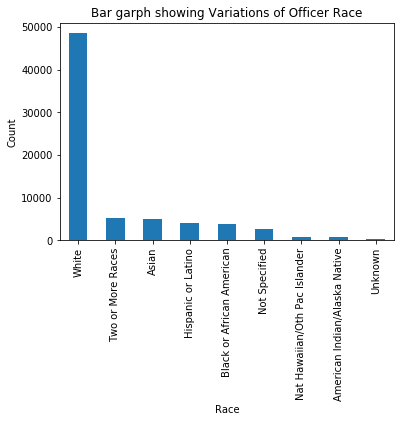

In [43]:
df['Officer Race'].value_counts().plot(kind='bar')
plt.title('Bar garph showing Variations of Officer Race')
plt.xlabel('Race')
plt.ylabel('Count')

Inferences:
    
We can see that here 9 indidual indicators in the indicator White has highest 48501 values

##### Plotting the bar garph for Officer Year of Birth and its individual counts

Text(0, 0.5, 'Count')

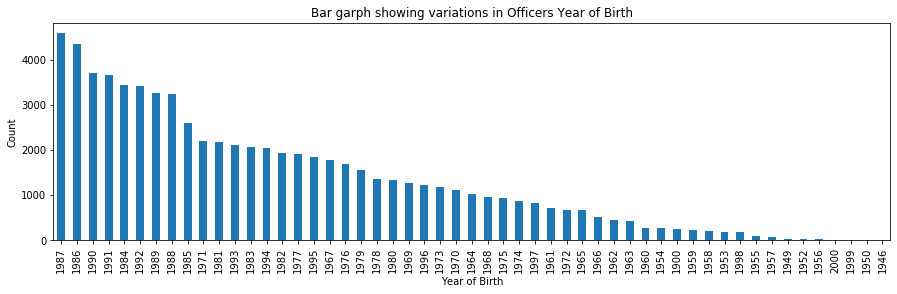

In [44]:
plt.figure(figsize=(15,4))
df['Officer Year of Birth'].value_counts().plot(kind='bar')
plt.title('Bar garph showing variations in Officers Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Count')

Inferences:
    
We can see that here 53 indidual years  in that  Year 1987  has highest 4577 values
Year range Between 1946 to 1987 (~41 years)

##### Plotting the bar garph for  Officer Bureau Desc and its individual counts

Text(0, 0.5, 'Count')

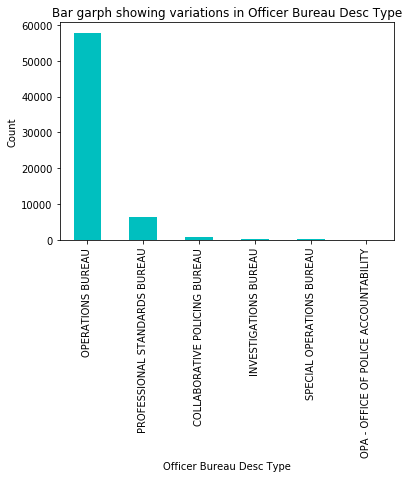

In [45]:
df['Officer Bureau Desc'].value_counts().plot(kind='bar',color='c')
plt.title('Bar garph showing variations in Officer Bureau Desc Type')
plt.xlabel('Officer Bureau Desc Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 6 indidual indicators in the indicator OPERATIONS BUREAU has highest 57817 values

##### Plotting the bar garph for Officer Precinct Desc and its individual counts

Text(0, 0.5, 'Count')

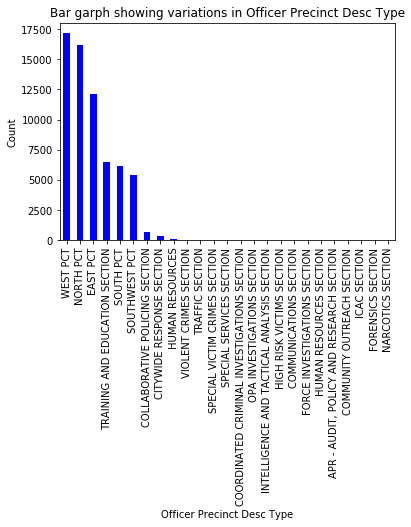

In [46]:
df['Officer Precinct Desc'].value_counts().plot(kind='bar',color='b')
plt.title('Bar garph showing variations in Officer Precinct Desc Type')
plt.xlabel('Officer Precinct Desc Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 25 indidual indicators in the indicator WEST PCT has highest 17171 values

##### Plotting the bar garph for Sector and its individual counts

Text(0, 0.5, 'Count')

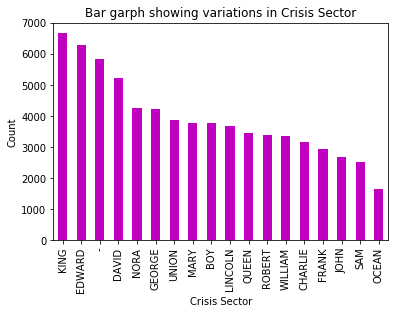

In [47]:
df['Sector'].value_counts().plot(kind='bar',color='m')
plt.title('Bar garph showing variations in Crisis Sector')
plt.xlabel('Crisis Sector')
plt.ylabel('Count')

Inferences:
    
We can see that here 18 indidual indicators in the indicator KING has highest   6668 values

##### Plotting the bar garph for Beat and its individual counts

Text(0, 0.5, 'Count')

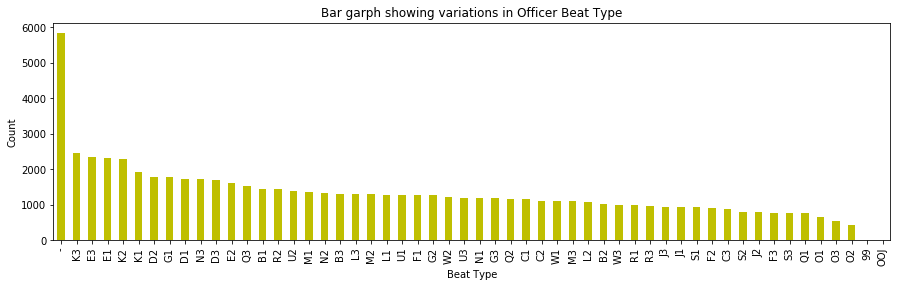

In [48]:
plt.figure(figsize=(15,4))
df['Beat'].value_counts().plot(kind='bar', color='y')
plt.title('Bar garph showing variations in Officer Beat Type')
plt.xlabel('Beat Type')
plt.ylabel('Count')

Inferences:
    
We can see that here 54 indidual indicators in the indicator K3  has highest values

### Feature Engineering & Feature Selection 

In [49]:
# Identifying Null Values in Dataframe 
df.isnull().sum()

Template ID                       0
Reported Date                     0
Reported Time                     0
Occurred Date / Time              0
Call Type                         0
Initial Call Type                 0
Final Call Type                   0
Disposition                       0
Use of Force Indicator            0
Subject Veteran Indicator         0
CIT Officer Requested             0
CIT Officer Dispatched            0
CIT Officer Arrived               0
Officer ID                        0
Officer Gender                    0
Officer Race                      0
Officer Year of Birth             0
Officer Years of Experience       0
CIT Certified Indicator           0
Officer Bureau Desc            5748
Officer Precinct Desc          6088
Officer Squad Desc             5699
Precinct                          0
Sector                            0
Beat                              0
Reprted_Year                      0
Reported_Month                    0
Occurred_Year               

In [50]:
# Unique Values in Dataframe 
df.nunique()

Template ID                    69990
Reported Date                   2527
Reported Time                      1
Occurred Date / Time           63985
Call Type                          9
Initial Call Type                175
Final Call Type                  210
Disposition                       30
Use of Force Indicator             2
Subject Veteran Indicator          2
CIT Officer Requested              2
CIT Officer Dispatched             2
CIT Officer Arrived                2
Officer ID                      1259
Officer Gender                     3
Officer Race                       9
Officer Year of Birth             53
Officer Years of Experience       82
CIT Certified Indicator            2
Officer Bureau Desc                6
Officer Precinct Desc             25
Officer Squad Desc               182
Precinct                           8
Sector                            18
Beat                              54
Reprted_Year                       9
Reported_Month                    12
O

Inferences: 

The columns Officer Bureau Desc, Officer Precinct Desc, Officer Squad Desc has 5742, 6085, 5696 null values respectively.
and Most of the features are Categorical
    


#### Convering Categorical values to  Numerical values

In [51]:
#Replacing Categorical values with Numerical based on Frequency 
df['Use of Force Indicator']=df['Use of Force Indicator'].map({'N':0,'Y':1})
df['Subject Veteran Indicator']=df['Subject Veteran Indicator'].map({'N':0,'Y':1})
df['CIT Officer Requested']=df['CIT Officer Requested'].map({'N':0,'Y':1})
df['CIT Officer Dispatched']=df['CIT Officer Dispatched'].map({'N':0,'Y':1})
df['CIT Officer Arrived']=df['CIT Officer Arrived'].map({'N':0,'Y':1})

In [52]:
df['Officer Years of Experience'].value_counts()

 1     10761
 2      8644
 3      7194
 4      5038
 5      4425
       ...  
 71        2
-5         2
-3         1
 75        1
-48        1
Name: Officer Years of Experience, Length: 82, dtype: int64

In [53]:
df = df[df['Officer Years of Experience'] >=0]
df['Officer Years of Experience'].value_counts()

1     10761
2      8644
3      7194
4      5038
5      4425
      ...  
58        4
73        4
68        2
71        2
75        1
Name: Officer Years of Experience, Length: 76, dtype: int64

Inferences:

Years of Experiance should be positive. SO, removing all the -ve values. 

In [54]:
df['Officer Gender']=df['Officer Gender'].map({'F':0,'M':1})

Inferences: 

Based on Count/Frequency replaced all Categorical values with Numberical values

In [55]:
df.head()

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat,Reprted_Year,Reported_Month,Occurred_Year,Occurred_Month
6,43946,2015-05-15T00:00:00,00:00:00,05/15/2015 06:47:32 PM,911,SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS,--CRISIS COMPLAINT - GENERAL,Emergent Detention / ITA,0,0,...,OPERATIONS BUREAU,NORTH PCT,NORTH PCT 2ND W - BOY,North,LINCOLN,L2,2015,5,2015,5
7,43469,2015-05-15T00:00:00,00:00:00,05/15/2015 11:16:25 AM,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Mobile Crisis Team,0,0,...,OPERATIONS BUREAU,EAST PCT,EAST PCT 2ND W - EDWARD,East,EDWARD,E1,2015,5,2015,5
8,43662,2015-05-15T00:00:00,00:00:00,05/15/2015 09:33:28 PM,ONVIEW,HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT),--CRISIS COMPLAINT - GENERAL,No Action Possible / Necessary,0,0,...,OPERATIONS BUREAU,WEST PCT,WEST PCT 3RD W - KING,West,KING,K1,2015,5,2015,5
9,57315,2015-05-15T00:00:00,00:00:00,05/15/2015 06:16:56 PM,911,HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT),--DISTURBANCE - OTHER,Shelter Transport,0,0,...,OPERATIONS BUREAU,EAST PCT,EAST PCT 3RD W - E/G RELIEF,-,-,-,2015,5,2015,5
10,43479,2015-05-15T00:00:00,00:00:00,05/15/2015 06:10:23 PM,911,"DISTURBANCE, MISCELLANEOUS/OTHER",--CRISIS COMPLAINT - GENERAL,Emergent Detention / ITA,0,0,...,OPERATIONS BUREAU,WEST PCT,WEST PCT 2ND W - K/Q RELIEF,West,KING,K3,2015,5,2015,5


#### Convering Categorical values to  Numerical values using mean replacement method

#####   Plotting the bar garph for Call Type and its individual counts before Conversion 

911                              47335
TELEPHONE OTHER, NOT 911         12249
-                                 5292
ONVIEW                            4839
TEXT MESSAGE                        86
ALARM CALL (NOT POLICE ALARM)       78
PROACTIVE (OFFICER INITIATED)        4
IN PERSON COMPLAINT                  2
POLICE (VARDA) ALARM                 1
Name: Call Type, dtype: int64

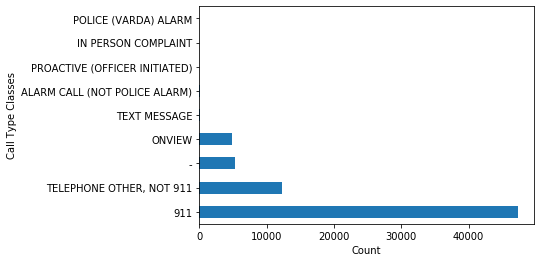

In [56]:
df['Call Type'].value_counts().plot(kind='barh')

plt.ylabel('Call Type Classes')
plt.xlabel('Count')
df['Call Type'].value_counts()

##### Plotting the bar garph for Call Type and its individual counts After Numerical Conversion 

0.677317    47335
0.175271    12249
0.075723     5292
0.069241     4839
0.001231       86
0.001116       78
0.000057        4
0.000029        2
0.000014        1
Name: Call Type, dtype: int64

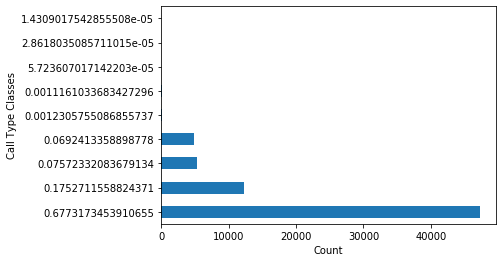

In [57]:
Call_Type=df['Call Type'].value_counts()/len(df['Call Type'])
df['Call Type']= df['Call Type'].map(Call_Type)

df['Call Type'].value_counts().plot(kind='barh')
plt.ylabel('Call Type Classes')
plt.xlabel('Count')
df['Call Type'].value_counts()

Inferences:
    
    As we have lot of categorical values in this column, I've converted to numercial values.

##### Converting Initial Call Type feature 

In [58]:
Initial_Call_Type=df['Initial Call Type'].value_counts()/len(df['Initial Call Type'])
df['Initial Call Type']= df['Initial Call Type'].map(Initial_Call_Type)
df['Initial Call Type'].head()

6     0.175844
7     0.178691
8     0.016226
9     0.016226
10    0.087128
Name: Initial Call Type, dtype: float64

##### Converting Final Call Type feature 

In [59]:
Final_Call_Type=df['Final Call Type'].value_counts()/len(df['Final Call Type'])
df['Final Call Type']= df['Final Call Type'].map(Final_Call_Type)
df['Final Call Type'].head()

6     0.700369
7     0.700369
8     0.700369
9     0.022236
10    0.700369
Name: Final Call Type, dtype: float64

##### Converting Disposition feature 

In [60]:
Disposition=df['Disposition'].value_counts()/len(df['Disposition'])

df['Disposition']=df['Disposition'].map(Disposition)

df['Disposition'].head()

6     0.306599
7     0.040194
8     0.200698
9     0.002247
10    0.306599
Name: Disposition, dtype: float64

##### Converting Officer Race feature 

In [61]:
Officer_Race=df['Officer Race'].value_counts()/len(df['Officer Race'])
df['Officer Race']=df['Officer Race'].map(Officer_Race)

df['Officer Race'].head()

6     0.688478
7     0.688478
8     0.688478
9     0.688478
10    0.688478
Name: Officer Race, dtype: float64

##### Converting Precinct feature 

In [62]:
Precinct=df['Precinct'].value_counts()/len(df['Precinct'])
df['Precinct']=df['Precinct'].map(Precinct)

df['Precinct'].head()

6     0.259036
7     0.193630
8     0.271113
9     0.081747
10    0.271113
Name: Precinct, dtype: float64

##### Converting Sector feature 

In [63]:
Sector= df['Sector'].value_counts()/len(df['Sector'])
df['Sector']=df['Sector'].map(Sector)

df['Sector'].head()

6     0.052400
7     0.089117
8     0.094783
9     0.082062
10    0.094783
Name: Sector, dtype: float64

##### Converting Beat feature 

In [64]:
Beat= df['Beat'].value_counts()/len(df['Beat'])

df['Beat']=df['Beat'].map(Beat)

df['Beat'].head()

6     0.015325
7     0.032896
8     0.027402
9     0.081647
10    0.035028
Name: Beat, dtype: float64

##### Imputing missing values in Officer Precinct Desc feature and  Converting to Numerical

In [65]:
df['Officer Precinct Desc']=df['Officer Precinct Desc'].fillna(0)
Officer_Precinct_Desc= df['Officer Precinct Desc'].value_counts()/len(df['Officer Precinct Desc'])
df['Officer Precinct Desc']=df['Officer Precinct Desc'].map(Officer_Precinct_Desc)
df['Officer Precinct Desc'].head()

6     0.231033
7     0.172281
8     0.243897
9     0.172281
10    0.243897
Name: Officer Precinct Desc, dtype: float64

##### Imputing missing values in Officer Squad Desc feature and  Converting to Numerical

In [66]:
df['Officer Squad Desc']=df['Officer Squad Desc'].fillna(0)
Officer_Squad_Desc= df['Officer Squad Desc'].value_counts()/len(df['Officer Squad Desc'])
df['Officer Squad Desc']=df['Officer Squad Desc'].map(Officer_Squad_Desc)
df['Officer Squad Desc'].head()

6     0.012120
7     0.015039
8     0.017343
9     0.014939
10    0.016055
Name: Officer Squad Desc, dtype: float64

##### Imputing missing values in Officer Bureau Desc feature and Converting to Numerical

In [67]:
df['Officer Bureau Desc']=df['Officer Bureau Desc'].fillna(0)
Officer_Bureau_Desc= df['Officer Bureau Desc'].value_counts()/len(df['Officer Squad Desc'])
df['Officer Bureau Desc']=df['Officer Bureau Desc'].map(Officer_Bureau_Desc)
df['Officer Bureau Desc'].head()

6     0.819435
7     0.819435
8     0.819435
9     0.819435
10    0.819435
Name: Officer Bureau Desc, dtype: float64

In [68]:
#Finally No Missing Values in DataFrame
df.isna().sum()

Template ID                    0
Reported Date                  0
Reported Time                  0
Occurred Date / Time           0
Call Type                      0
Initial Call Type              0
Final Call Type                0
Disposition                    0
Use of Force Indicator         0
Subject Veteran Indicator      0
CIT Officer Requested          0
CIT Officer Dispatched         0
CIT Officer Arrived            0
Officer ID                     0
Officer Gender                 0
Officer Race                   0
Officer Year of Birth          0
Officer Years of Experience    0
CIT Certified Indicator        0
Officer Bureau Desc            0
Officer Precinct Desc          0
Officer Squad Desc             0
Precinct                       0
Sector                         0
Beat                           0
Reprted_Year                   0
Reported_Month                 0
Occurred_Year                  0
Occurred_Month                 0
dtype: int64

Inferences:

Here we have lot of Categorical Variables in Dataset. Here, I've used scaling method instead of One-Hot encoding and get_dummies.

To avoid Curse of Dimensionality as  One-Hot encoding and get_dummies methods will create sparse matrix with more features, thus it may affect model Performace


In [69]:
#Removing unwanted Fields information 
df.drop(['Template ID','Officer ID','Occurred Date / Time','Occurred Date / Time','Reported Date','Reported Time','Reprted_Year','Reported_Month','Occurred_Year','Occurred_Month'], axis=1, inplace=True)

In [70]:
df.head()

,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,CIT Officer Requested,CIT Officer Dispatched,CIT Officer Arrived,Officer Gender,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
6,0.677317,0.175844,0.700369,0.306599,0,0,1,1,1,1,0.688478,1968,39,0,0.819435,0.231033,0.012120,0.259036,0.052400,0.015325
7,0.677317,0.178691,0.700369,0.040194,0,0,1,1,0,0,0.688478,1969,7,0,0.819435,0.172281,0.015039,0.193630,0.089117,0.032896
8,0.069241,0.016226,0.700369,0.200698,0,0,0,0,1,1,0.688478,1984,8,0,0.819435,0.243897,0.017343,0.271113,0.094783,0.027402
9,0.677317,0.016226,0.022236,0.002247,0,0,0,0,1,0,0.688478,1970,2,0,0.819435,0.172281,0.014939,0.081747,0.082062,0.081647
10,0.677317,0.087128,0.700369,0.306599,0,0,0,0,1,1,0.688478,1981,6,0,0.819435,0.243897,0.016055,0.271113,0.094783,0.035028


##### Seperating features with target variable

In [71]:
#Seperating features
x = [x for x in df.columns if x != 'CIT Certified Indicator']
X=df[x]
y= df['CIT Certified Indicator']

##### Chi Square test for importent features

In [72]:
#apply SelectKBest class to extract top 12 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 

In [73]:
featureScores

,Features,Score
0,Call Type,6.324511
1,Initial Call Type,0.163412
2,Final Call Type,3.116880
3,Disposition,6.352167
4,Use of Force Indicator,4.139137
5,Subject Veteran Indicator,1.134397
6,CIT Officer Requested,1046.646018
7,CIT Officer Dispatched,1046.646018
8,CIT Officer Arrived,1260.743879
9,Officer Gender,10.055223


In [74]:
print(featureScores.nlargest(12,'Score'))  #print 12 best features

                       Features         Score
12  Officer Years of Experience  22839.878533
8           CIT Officer Arrived   1260.743879
6         CIT Officer Requested   1046.646018
7        CIT Officer Dispatched   1046.646018
13          Officer Bureau Desc    288.268542
11        Officer Year of Birth    157.679016
15           Officer Squad Desc    133.593723
9                Officer Gender     10.055223
10                 Officer Race      6.947382
3                   Disposition      6.352167
0                     Call Type      6.324511
16                     Precinct      5.941726


Inferences:

Based on Score from Chi Square test, we are considering top 12 features and dropping the remaning

In [75]:
#Dropping the unimportant features
X.drop(['Initial Call Type','Beat','Officer Precinct Desc','Subject Veteran Indicator','Sector','Final Call Type','Use of Force Indicator'],axis=1,inplace=True)

In [76]:
X.head()

,Call Type,Disposition,CIT Officer Requested,CIT Officer Dispatched,CIT Officer Arrived,Officer Gender,Officer Race,Officer Year of Birth,Officer Years of Experience,Officer Bureau Desc,Officer Squad Desc,Precinct
6,0.677317,0.306599,1,1,1,1,0.688478,1968,39,0.819435,0.012120,0.259036
7,0.677317,0.040194,1,1,0,0,0.688478,1969,7,0.819435,0.015039,0.193630
8,0.069241,0.200698,0,0,1,1,0.688478,1984,8,0.819435,0.017343,0.271113
9,0.677317,0.002247,0,0,1,0,0.688478,1970,2,0.819435,0.014939,0.081747
10,0.677317,0.306599,0,0,1,1,0.688478,1981,6,0.819435,0.016055,0.271113


##### Comparing Output  Feature

0    37886
1    32000
Name: CIT Certified Indicator, dtype: int64

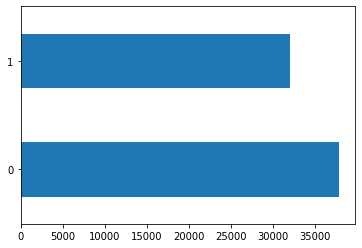

In [77]:
y.value_counts().plot(kind='barh')
y.value_counts()

Inferences:
Based on difference between 0's and 1's. 
it's an imbalenced dataset (~5872 difference)


**Evaluation Metric: F-Score**

The metrics such as Precision, Sensitivity, Recall, Specificity, F-Score, ROC-AUC Curve is used to evaluate the Classification problem.

Here, we could observe that the output data is slightly imbalnced, here we could use the F-1 Score. 
F-1 score is generally useful when working with the imbalanced dataset and it also combines precision with recall into a single metric. 

##### Splitting the data into train & test

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50,stratify=y)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 48,920
Test samples: 20,966


##### Coorelation matrix

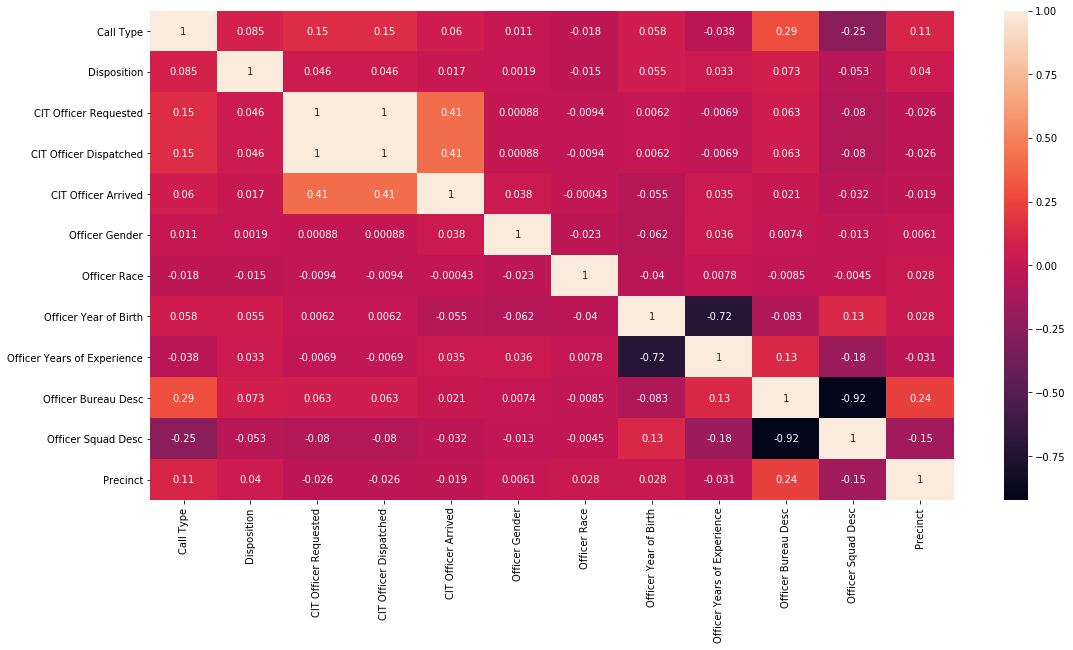

In [79]:
plt.figure(figsize=(18,9))
sns.heatmap(X.corr(),annot=True)

Inferences:
    
Based on Coorelation matrix we can see that the columns CIT Officer Requested  and CIT Officer Dispatched are highly coorelated 

##### Creating pipeline with Standrad Scaler

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

processing_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=0,strategy='median')),('scaler', StandardScaler())])


In [81]:
processing_pipeline

Pipeline(steps=[('impute_missing',
                 SimpleImputer(missing_values=0, strategy='median')),
                ('scaler', StandardScaler())])

### Prediction using LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

In [83]:
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),('lr', LogisticRegression(penalty='l2'))])
LR = modeling_pipeline.fit(X_train, y_train)

In [84]:
#calculating the accuracy score on test data and Training data 
predictions=LR.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))
predictions_train = LR.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Test score: 0.6319278832395306
Training Score: 0.6298650858544562


##### Plotting the ROC_AUC_CURVE

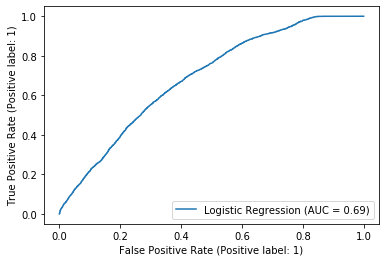

In [85]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(LR, X_test,y_test,name='Logistic Regression')

In [86]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, predictions))

confusion_matrix(y_test, predictions)

f1_score: 0.5801186136351271


array([[7918, 3448],
       [4269, 5331]], dtype=int64)

Inferences:

1.Here I've used Logistic Regression with L2 penalty.

2.Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

3.Since it's a imbalneced target variable so we are considering F1-Score for Performace Evaluation metrics
     f1_score is 58% with Logistic Regression with L2 penalty
  
4.AUC value is 69% that implies, the model is 69% accurate in distinguishing the classes.


##### Logistic Regression using Grid Search CV at various regularization strengths and liblinear solver

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

P_LR = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(penalty='l2',solver='liblinear'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

LR = GridSearchCV(P_LR, param_grid=params, cv=10, scoring='f1', refit=True)
LR = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)


In [88]:
#calculating the accuracy score on test data and Training data 
predictions=LR.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))
predictions_train = LR.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Test score: 0.6331679862634741
Training Score: 0.6311733442354865


##### Plotting the ROC_AUC_CURVE

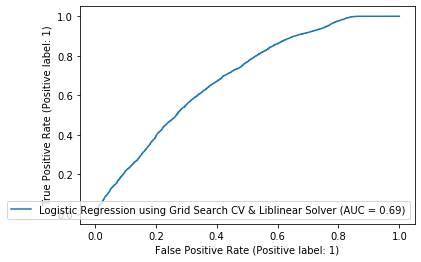

In [89]:
plot_roc_curve(LR, X_test,y_test, name='Logistic Regression using Grid Search CV & Liblinear Solver')

In [90]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, LR_pred))

confusion_matrix(y_test, LR_pred)

f1_score: 0.5826233244695284


array([[7907, 3459],
       [4232, 5368]], dtype=int64)

In [91]:
LR.best_params_

{'lr__C': 0.01}

Inferences:

1.Here i'm using Logistic Regression with 10 folds Cross Validation,L2 penalty and liblinear solver.

2.Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting.

3.Since it's a imbalneced target variable so we are considering F1-Score for Performace Evaluation metrics
  f1_score is 58% with Logistic Regression with L2 penalty with 10 folds Cross Validation.
  
4.AUC value is 69% that implies, the model is 69% accurate in distinguishing the classes.

##### Logistic Regression using  Grid Search CV at various regularization strengths and saga solver

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

P_LR = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(solver='saga'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

LR = GridSearchCV(P_LR, param_grid=params, cv=10, scoring='f1', refit=True)
LR = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [94]:
#calculating the accuracy score on test data and Training data 
predictions=LR.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))
predictions_train = LR.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Test score: 0.6332156825336259
Training Score: 0.6308871627146362


##### Plotting the ROC_AUC_CURVE

In [ ]:
plot_roc_curve(LR, X_test,y_test, name='Logistic Regression using Grid Search CV & Saga Solver')

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, LR_pred))
confusion_matrix(y_test, LR_pred)

In [ ]:
LR.best_params_

Inferences:

1.Here i'm using Logistic Regression with 10 folds Cross Validation,L2 penalty and Saga solver

2.Training accuracy and Test accuracy are close to each other, so there is no case of over-fitting or under-fitting

3.Since it's a imbalneced target variable so we are considering F1-Score for Performace Evaluation metrics
  f1_score is 58% with Logistic Regression with L2 penalty and saga solver.
  
4.AUC value is 69% that implies, the model is 69% accurate in distinguishing the classes.

5.Logistic Regression with Various regularization strengths giving same kind of results.

### Prediction using  K-Nearest Neighbours 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

knn_m= Pipeline([('processing', processing_pipeline),('model', KNeighborsClassifier())])

param_grid = [
  {'model__n_neighbors': [1, 3, 7, 10, 15], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring='f1', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)

In [ ]:
#calculating the accuracy score on test data and Training data 
predictions_train = knn_results.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=knn_results.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

##### Plotting the ROC_AUC_CURVE

In [ ]:
plot_roc_curve(knn_results, X_test,y_test, name='KNN')

In [ ]:
knn_results_p= knn_results.predict(X_test)
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, knn_results_p))

confusion_matrix(y_test, knn_results_p)

In [ ]:
knn_results.best_params_

Inferences:

1.By Using KNN, F1_Score is  82%  which is better then Logistic regression.

2.Training accuracy and Test accuracy are not close to each other, Training accuracy is high then compared to Test accuracy     means 
  it's Overfitting(High Variance)

### Prediction using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_dt = Pipeline([('processing', processing_pipeline),('dt', DecisionTreeClassifier())])
params = {'dt__max_depth': [1, 5, 10, 15, 25, 50, 100],'dt__min_samples_split': [3, 10, 15]}
dt = GridSearchCV(p_dt, param_grid=params, cv=10, scoring='f1', refit=True)
dt = dt.fit(X_train, y_train)
dt_p = dt.predict(X_test)

In [ ]:
#calculating the accuracy score on test data and Training data 
predictions_train = dt.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=dt.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

##### Plotting the ROC_AUC_CURVE

In [ ]:
plot_roc_curve(dt, X_test,y_test, name='Decision Tree')

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, dt_p))

confusion_matrix(y_test, dt_p)

In [ ]:
dt.best_params_

Inferences:

1.Decision Tree giving best F1_Score (87%) then comparing to Logisic regression and KNN 

2.Training accuracy and Test accuracy are not close to each other, Training accuracy is high then compared to Test accuracy means it's Overfitting (Depth increases in DecisionTree will cause to high Variance that means Over fitting)

### Prediction using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
p_RF = Pipeline([('processing', processing_pipeline),('RF', RandomForestClassifier())])
#params = {'RF__max_depth': [1, 5, 10, 15],'RF__min_samples_split': [3, 10]}
#RF = GridSearchCV(p_RF, cv=10, scoring='f1', refit=True)
RF = p_RF.fit(X_train, y_train)
RF_p = RF.predict(X_test)

In [ ]:
#calculating the accuracy score on test data and Training data 
predictions_train = RF.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=RF.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

##### Plotting the ROC_AUC_CURVE

In [ ]:
plot_roc_curve(RF, X_test,y_test, name='RandomForest')

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, RF_p))

confusion_matrix(y_test, RF_p)

Inferences:

1.By Using RandomForest, F1_Score is 88%  which is better  than all the previous models.

2.Training accuracy and Test accuracy are not close to each other, Training accuracy is high then compared to Test accuracy means 
  it's Overfitting(High Variance)

### Prediction using Xgboost

In [115]:
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier
p_xgb = Pipeline([('processing', processing_pipeline),('xgb', xgb.XGBClassifier())])
xgb = p_xgb.fit(X_train, y_train)
xgb_p = xgb.predict(X_test)

In [116]:
#calculating the accuracy score on test data and Training data 
predictions_train = xgb.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=xgb.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Training Score: 0.8916802943581358
Test score: 0.8785652961938376


##### Plotting the ROC_AUC_CURVE

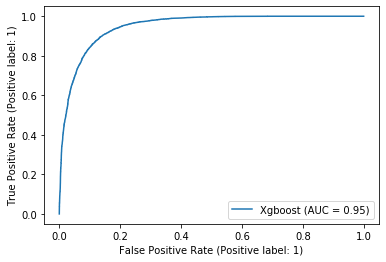

In [117]:
plot_roc_curve(xgb, X_test,y_test, name='Xgboost')

In [118]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, xgb_p))
confusion_matrix(y_test, xgb_p)

f1_score: 0.8719058160595694


array([[9755, 1611],
       [ 935, 8665]], dtype=int64)

Inferences:

1.By Using Xgboost, F1_Score is 87%  which is less slight than Random Forest Model.

2.Training accuracy and Test accuracy are not close to each other, Training accuracy is high then compared to Test accuracy means 
  it's Overfitting(High Variance)

### Prediction using SVM

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
p_svm= Pipeline([('processing', processing_pipeline),('clf', SVC(probability=True))])

In [ ]:
# fitting the model 
svm = p_svm.fit(X_train, y_train)
svm_p = svm.predict(X_test)

In [ ]:
#calculating the accuracy score on test data and Training data 
predictions_train = svm.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))
predictions=svm.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

##### Plotting the ROC_AUC_CURVE

In [ ]:
plot_roc_curve(svm, X_test,y_test, name='SVM using Grid Search CV')

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
print('f1_score:',f1_score(y_test, svm_p))

confusion_matrix(y_test, svm_p)

Inferences:

1.By Using SVM, F1_Score is 72%  which is less  than xgboost model.

2.Training accuracy and Test accuracy are close to each other. SO, there is no case for Over-fitting or Under-fitting.

**Explorative Data Analysis Outcomes:**

1.Officer Year of Birth --> Range Between 1946 to 1987 (~41 years)

2.Officer Years of Experience --> Having -ve Values but experiance must + ve 

3.Most of the Reprted_Year and Occurred_Year comes under same time span (2018 to 2022) 
  Highest in 2018 and lowerst in 2022

4.All the -ve years of experiance comes under Gender=N 

5.Male having highest years of experiance then compare to female

6.Officer Gender =N  having Highest Reporting Months then compare to Male and Female 

7.CIT Certified Indicator is Active after 2016 (Reported Year Range b/w 1900 -2020)

8.April month highest CIT Certified Indicator values occured 

**Machine Learning Outcomes**

**Evaluation Metric: F-Score**

1) The metrics such as Precision, Sensitivity, Recall, Specificity, F-Score, ROC-AUC Curve is used to evaluate the Classification problem.Here, we could observe that the output data is slightly imbalanced, here we could use the F-1 Score. F-1 score is generally useful when working with the imbalanced dataset and it also combines precision with recall into a single metric. 

2) f1_score is 58% with Logistic Regression with L2 penalty

3) f1_score is 58% with Logistic Regression with L2 penalty with 10 folds Cross Validation and liblinear solver.

4) f1_score is 58% with Logistic Regression with L2 penalty and saga solver.

5) By Using KNN, F1_Score is  82%  which is better then Logistic regression.

6) By Using RandomForest, F1_Score is 88%  which is better  than all the previous models.

7) By Using Xgboost, F1_Score is 87%  which is less slight than Random Forest Model.

8) By Using SVM, F1_Score is 72%  which is less  than xgboost model.

9) By comparing all the above implemented models, we can conclude that Randomforest model has improved the performance of the model.


**Conclusion** : Classificaion Problem is overcomed by evaluating variou factors such as Precision, Sensitivity, Recall, Specificity, F-Score, ROC-AUC Curve.Among all the algorithms  between KNN,RandomForest,Xgboost,SVM ,"Randomforest model has improved the performance of the model"

**Further Improvements and outcomes:**

Further, the results can be improved by having vast knowledge on the business domain, which could be useful in 
understanding and pre-processing the data. Thus, the outliers and any random noise can be removed. 

Neural networks along with Tensor-flow models can improve the performance of the model

**References** : 

1.https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

2.https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

3.https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/

4.https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

5.https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/